![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Computer Vision - Lecture 3</a>


## Object Detection with YOLO

In this notebook, we use pre-trained YOLO models for object detection task, with only a few
lines of code. Here are the topics for this notebook:

1. <a href="#1">Downloading a Pretrained Model</a>      
2. <a href="#2">Preprocessing an Image</a>
3. <a href="#3">Inference and Visualizating</a>
4. <a href="#4">Putting it all Together</a>
    

In [1]:
%%capture
! pip install -q -r ../requirements.txt

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

import torch
import cv2
from PIL import Image
from matplotlib import pyplot as plt

## 1. <a name="1">Downloading a Pretrained Model</a>
(<a href="#0">Go to top</a>)

Let's get an YOLOv5 model as the base model. You will use 'yolov5s' in the following example which is the lightest and fastest YOLOv5 model. 

In [4]:
%%capture
net = torch.hub.load('ultralytics/yolov5', 'yolov5s', trust_repo=True, verbose=False, device='cpu')

## 2. <a name="2">Pre-processing an Image</a>
(<a href="#0">Go to top</a>)

Next we download an image for inference. You can
feed an arbitrarily sized image, except one constraint for 
YOLO is that input height and width can be divided by 32.


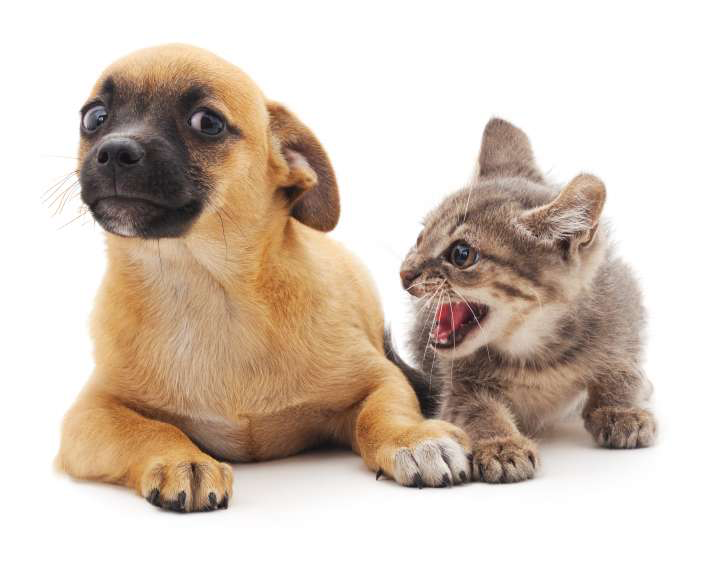

In [5]:
cat_dog = Image.open('../data/catdog.png')
cat_dog.show()

To predict objects shown on the image, wrap the image in `net`.

In [6]:
result = net(cat_dog)

# Show the result
result

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 561x728 1 cat, 1 dog
Speed: 12.8ms pre-process, 237.9ms inference, 1.6ms NMS per image at shape (1, 3, 512, 640)

## 3. <a name="3">Inference and Visualizating</a>
(<a href="#0">Go to top</a>)

The forward function, i.e. `net(x)` will return all detected bounding boxes, and the
corresponding predicted class names. To see the bounding boxes you can call `.pandas().xyxy[0]` on the result. You can also check which classes are part of the model by running `net.names`. The shape can be shown with `net(cat_dog).s`. 

In [7]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,392.849701,111.819122,652.435303,486.131042,0.732346,15,cat
1,48.843002,40.086815,478.005585,507.308167,0.598650,16,dog


To visualize the bounding boxes on the image itself, you can use `result.show()`.

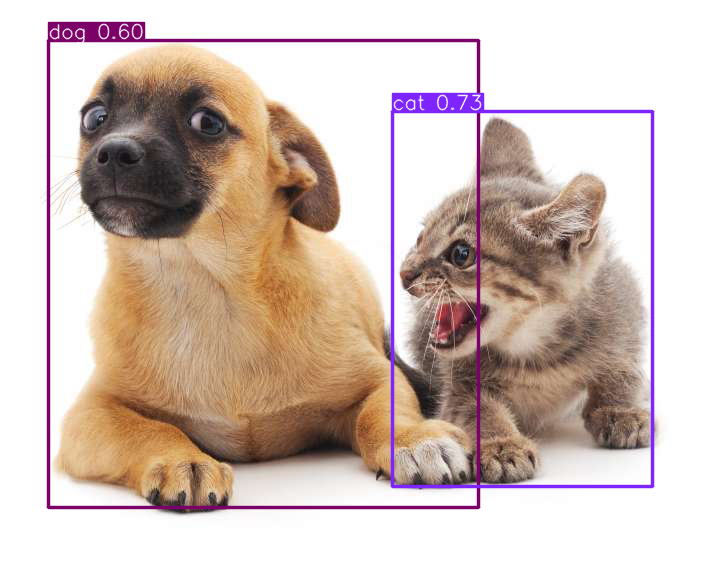

In [8]:
result.show()

## 4. <a name="4">Putting it all Together</a>
(<a href="#0">Go to top</a>)

Let's load the first example and add another image to verify the stability of YOLO.

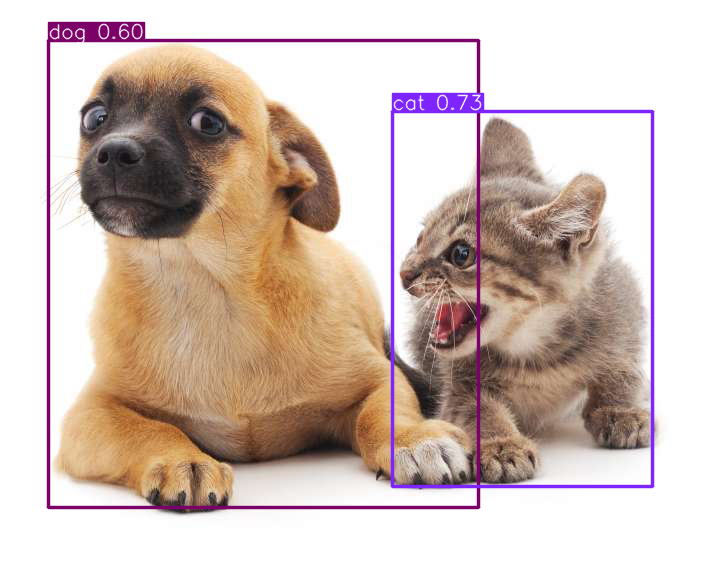

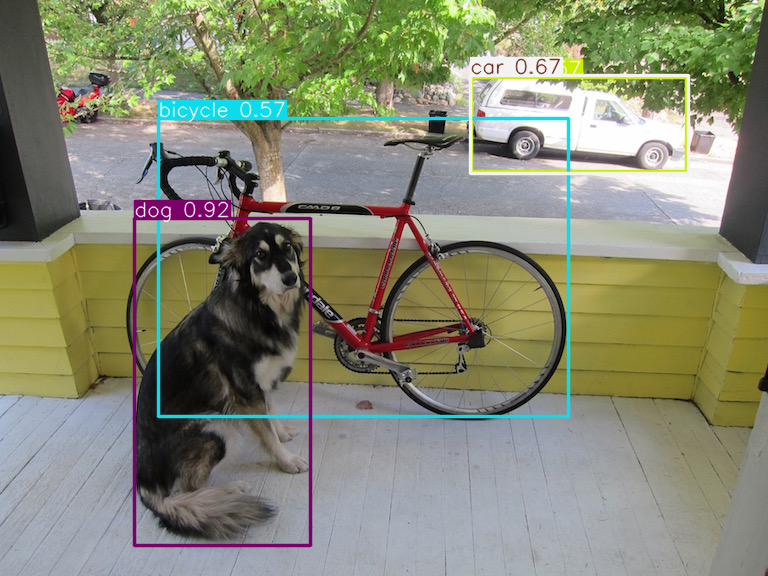

In [9]:
cat_dog = '../data/catdog.png'
dog_bike = '../data/bikedog.jpg'

# Inference - pass in as many images as you like here
results = net([cat_dog, dog_bike], size=640) # batch of images

# Results
results.print()  
results.show()

If you wanted to access the probability values for the predictions in the second image, you have to increase the index of `xyxy`.

In [10]:
# Show values for second image
for obj in results.xyxy[0]:
    x1, y1, x2, y2, conf, cls = obj
    print(f"Class: {net.names[int(cls)]}, Confidence: {conf}, Probability: {obj[5:]}") 

Class: cat, Confidence: 0.7323462963104248, Probability: tensor([15.])
Class: dog, Confidence: 0.598650336265564, Probability: tensor([16.])


In [11]:
# Show values for second image
for obj in results.xyxy[1]:
    x1, y1, x2, y2, conf, cls = obj
    print(f"Class: {net.names[int(cls)]}, Confidence: {conf}, Probability: {obj[5:]}") 

Class: dog, Confidence: 0.9170963764190674, Probability: tensor([16.])
Class: car, Confidence: 0.6687836050987244, Probability: tensor([2.])
Class: bicycle, Confidence: 0.5732481479644775, Probability: tensor([1.])
Class: truck, Confidence: 0.5703014731407166, Probability: tensor([7.])


Is the YOLO model inference simple and straightforward? If you want to learn object detection techniques, feel free to check more techniques at D2L [Computer Vision chapter](https://d2l.ai/chapter_computer-vision/index.html).